In [1]:
#import libraries
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#define variables
FAST_MA = 35
SLOW_MA = 75
STARTING_BALANCE = 10000

In [3]:
#define time period
START = datetime.datetime(2020, 1, 1)
END = datetime.datetime(2024, 1, 1)
YEARS = (END - START).days / 365.25

In [4]:
#load data into a pandas dataframe
# symbol = "^GSPC"
symbol = "BTC-USD"
price = yf.download(symbol, start=START, end=END)

price.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2020-01-01 00:00:00+00:00,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02 00:00:00+00:00,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03 00:00:00+00:00,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04 00:00:00+00:00,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05 00:00:00+00:00,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [5]:
#drop redundant columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], axis=1)

price.head()

Price,Close,Open
Ticker,BTC-USD,BTC-USD
Date,,
2020-01-01 00:00:00+00:00,7200.174316,7194.892090
2020-01-02 00:00:00+00:00,6985.470215,7202.551270
2020-01-03 00:00:00+00:00,7344.884277,6984.428711
2020-01-04 00:00:00+00:00,7410.656738,7345.375488
2020-01-05 00:00:00+00:00,7411.317383,7410.451660


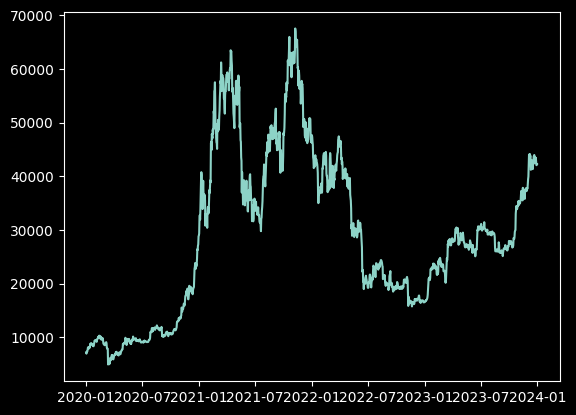

In [6]:
#plot chart
plt.style.use('dark_background')
plt.plot(price.Close)
plt.show()

In [7]:
#calculate daily return
price['Return'] = price.Close / price.Close.shift(1)

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

Price,Close,Open,Return,Bench_Bal
Ticker,BTC-USD,BTC-USD,,
Date,,,,
2023-12-27 00:00:00+00:00,43442.855469,42518.468750,1.021694,60335.838495
2023-12-28 00:00:00+00:00,42627.855469,43468.199219,0.981240,59203.921455
2023-12-29 00:00:00+00:00,42099.402344,42614.644531,0.987603,58469.976550
2023-12-30 00:00:00+00:00,42156.902344,42091.753906,1.001366,58549.835728
2023-12-31 00:00:00+00:00,42265.187500,42152.097656,1.002569,58700.228137


In [8]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

In [9]:
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Ticker,BTC-USD,BTC-USD,,,,,,
Date,,,,,,,,
2023-12-27 00:00:00+00:00,43442.855469,42518.468750,1.021694,60335.838495,93840.544903,-33504.706409,41449.904576,37501.926771
2023-12-28 00:00:00+00:00,42627.855469,43468.199219,0.981240,59203.921455,93840.544903,-34636.623449,41602.425558,37712.142083
2023-12-29 00:00:00+00:00,42099.402344,42614.644531,0.987603,58469.976550,93840.544903,-35370.568353,41727.543304,37911.338750
2023-12-30 00:00:00+00:00,42156.902344,42091.753906,1.001366,58549.835728,93840.544903,-35290.709175,41852.117857,38093.171224
2023-12-31 00:00:00+00:00,42265.187500,42152.097656,1.002569,58700.228137,93840.544903,-35140.316766,41988.862612,38277.830417


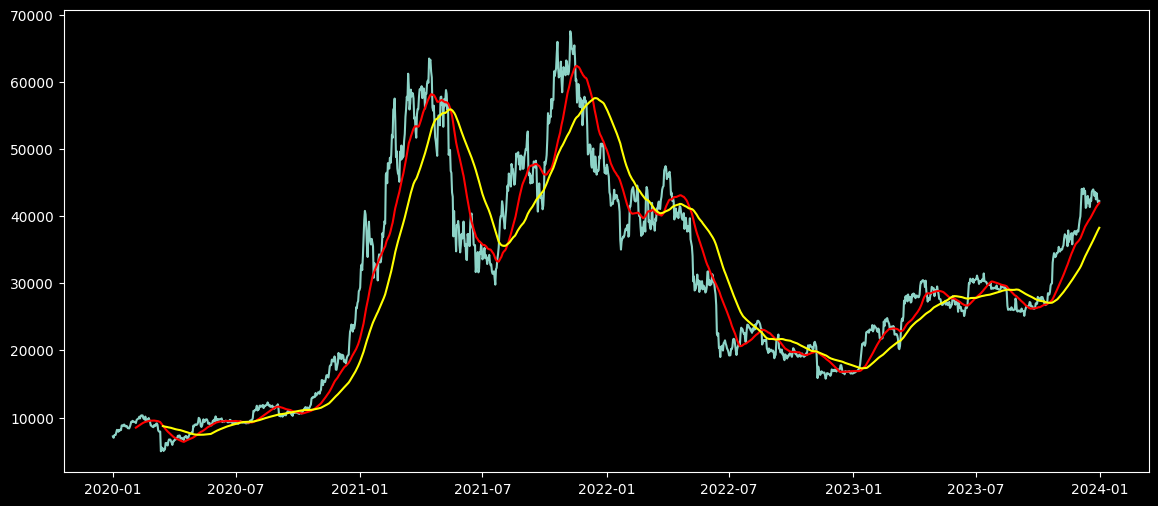

In [10]:
#draw graph
plt.figure(figsize=(14, 6))
plt.plot(price.Close)
plt.plot(price.Fast_MA, color="red")
plt.plot(price.Slow_MA, color="yellow")

plt.show()

In [11]:
#define entries
price['Long'] = price.Fast_MA > price.Slow_MA

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Ticker,BTC-USD,BTC-USD,,,,,,,
Date,,,,,,,,,
2023-12-27 00:00:00+00:00,43442.855469,42518.468750,1.021694,60335.838495,93840.544903,-33504.706409,41449.904576,37501.926771,True
2023-12-28 00:00:00+00:00,42627.855469,43468.199219,0.981240,59203.921455,93840.544903,-34636.623449,41602.425558,37712.142083,True
2023-12-29 00:00:00+00:00,42099.402344,42614.644531,0.987603,58469.976550,93840.544903,-35370.568353,41727.543304,37911.338750,True
2023-12-30 00:00:00+00:00,42156.902344,42091.753906,1.001366,58549.835728,93840.544903,-35290.709175,41852.117857,38093.171224,True
2023-12-31 00:00:00+00:00,42265.187500,42152.097656,1.002569,58700.228137,93840.544903,-35140.316766,41988.862612,38277.830417,True


In [12]:
#calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret
Ticker,BTC-USD,BTC-USD,,,,,,,,
Date,,,,,,,,,,
2023-12-27 00:00:00+00:00,43442.855469,42518.468750,1.021694,60335.838495,93840.544903,-33504.706409,41449.904576,37501.926771,True,1.021694
2023-12-28 00:00:00+00:00,42627.855469,43468.199219,0.981240,59203.921455,93840.544903,-34636.623449,41602.425558,37712.142083,True,0.981240
2023-12-29 00:00:00+00:00,42099.402344,42614.644531,0.987603,58469.976550,93840.544903,-35370.568353,41727.543304,37911.338750,True,0.987603
2023-12-30 00:00:00+00:00,42156.902344,42091.753906,1.001366,58549.835728,93840.544903,-35290.709175,41852.117857,38093.171224,True,1.001366
2023-12-31 00:00:00+00:00,42265.187500,42152.097656,1.002569,58700.228137,93840.544903,-35140.316766,41988.862612,38277.830417,True,1.002569


In [13]:
#calculate system balance
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

price.tail()

Price,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Sys_Ret,Sys_Bal
Ticker,BTC-USD,BTC-USD,,,,,,,,,
Date,,,,,,,,,,,
2023-12-27 00:00:00+00:00,43442.855469,42518.468750,1.021694,60335.838495,93840.544903,-33504.706409,41449.904576,37501.926771,True,1.021694,33791.759394
2023-12-28 00:00:00+00:00,42627.855469,43468.199219,0.981240,59203.921455,93840.544903,-34636.623449,41602.425558,37712.142083,True,0.981240,33157.816629
2023-12-29 00:00:00+00:00,42099.402344,42614.644531,0.987603,58469.976550,93840.544903,-35370.568353,41727.543304,37911.338750,True,0.987603,32746.762599
2023-12-30 00:00:00+00:00,42156.902344,42091.753906,1.001366,58549.835728,93840.544903,-35290.709175,41852.117857,38093.171224,True,1.001366,32791.488622
2023-12-31 00:00:00+00:00,42265.187500,42152.097656,1.002569,58700.228137,93840.544903,-35140.316766,41988.862612,38277.830417,True,1.002569,32875.717568


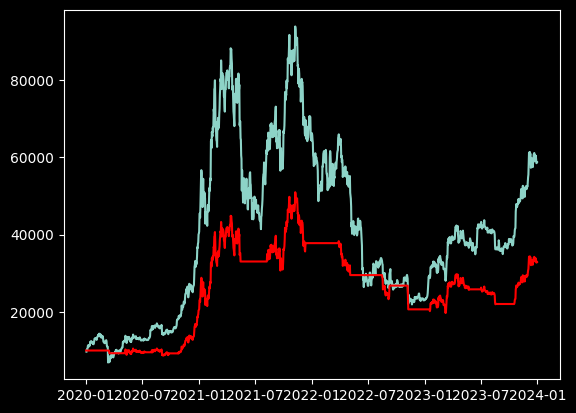

In [14]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal, color="red")

plt.show()

In [15]:
#calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()

price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak

sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

print(sys_dd)

-61.35


In [16]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: 505.04%
Benchmark CAGR: 56.84
Benchmark DD: -76.63%

System Total return: 228.76%
System CAGR: 34.65
System DD: -61.35%
System Time in the Market: 53.25%


In [17]:
def backtest(price, period_fast, period_slow):
    #calculate moving averages
    price['Fast_MA'] = price.Close.rolling(window = period_fast).mean().iloc[:,0]
    price['Slow_MA'] = price.Close.rolling(window = period_slow).mean().iloc[:,0]

    #Hold a position for every day the close is above the MA
    # New condition: Long position only if Fast MA > Slow MA and Slow MA is trending up
    price['Long'] = (price.Fast_MA > price.Slow_MA) & (price.Slow_MA > price.Slow_MA.shift(1))

    ###############################################################################################################
    # Calculate Exponential Moving Averages
    price['Fast_EMA'] = price['Close'].ewm(span=period_fast, adjust=False).mean().iloc[:,0]
    price['Slow_EMA'] = price['Close'].ewm(span=period_slow, adjust=False).mean().iloc[:,0]

    # New condition: Long position only if Fast EMA > Slow EMA and Slow EMA is trending up
    price['Long'] = price['Fast_EMA'] > price['Slow_EMA']
    ##################################################################################################################

    #on days when there is no trade, return is 1
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)

    #calculate balance
    price['Sys_Balance'] = STARTING_BALANCE * price.Sys_Return.cumprod()
    cagr_system = (((price.Sys_Balance.iloc[-1]/price.Sys_Balance.iloc[0])**(1/YEARS))-1)*100

    return cagr_system

In [18]:
periods_slow = []
periods_fast = []
periods_slow.extend(range(5, 300, 5))
periods_fast.extend(range(5, 300, 5))

cagr = {}

results_full = []

for slow in periods_slow:
    results_fast = []
    for fast in periods_fast:
        result = backtest(price, fast, slow)
        results_fast.append(result)
    results_full.append(results_fast)

<Axes: >

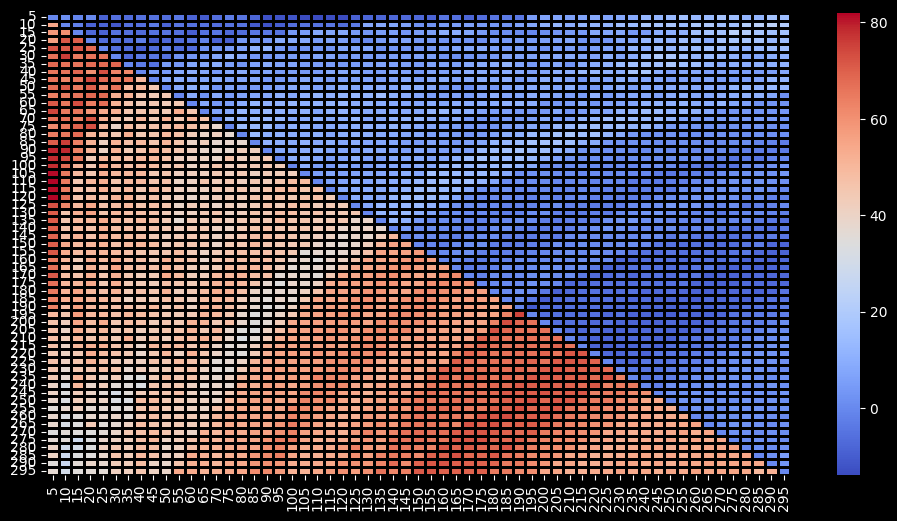

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_full,
            cmap="coolwarm",
            xticklabels=periods_fast,
            yticklabels=periods_slow,
            linewidth=1,
            linecolor="black"
           )

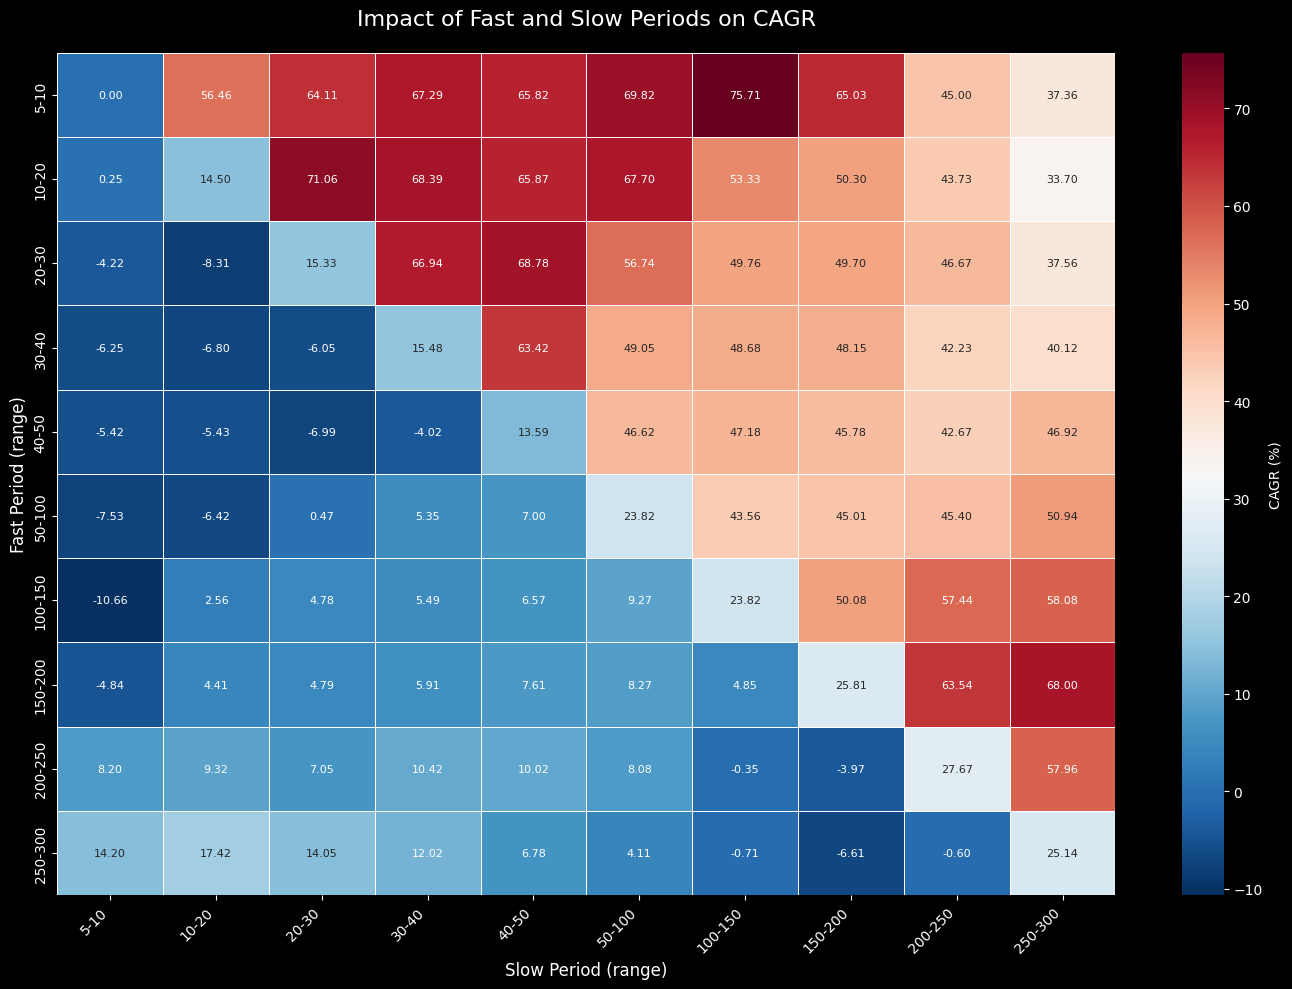

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the periods (for example)
periods_slow = []
periods_fast = []

periods_slow.extend(range(5, 300, 5))
periods_fast.extend(range(5, 300, 5))

# Create an empty DataFrame to store results
results_df = pd.DataFrame(index=periods_slow, columns=periods_fast)

# Assuming `backtest` function exists and produces results
# The loop populates the results_df with backtest outcomes
for slow in periods_slow:
    for fast in periods_fast:
        result = backtest(price, fast, slow)
        results_df.loc[slow, fast] = result

# Binning logic
fast_bins = [5, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300]
slow_bins = [5, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300]

# Create binned DataFrame
df_binned = pd.DataFrame(index=pd.IntervalIndex.from_breaks(fast_bins, closed="right"),
                         columns=pd.IntervalIndex.from_breaks(slow_bins, closed="right"))

# Iterate and calculate mean CAGR for each bin
for fast_range in df_binned.index:
    for slow_range in df_binned.columns:
        # Filter the DataFrame within the bin ranges
        filtered_df = results_df.loc[
            (results_df.index >= slow_range.left) & (results_df.index < slow_range.right),
            (results_df.columns >= fast_range.left) & (results_df.columns < fast_range.right)
        ]
        mean_cagr = filtered_df.mean().mean()  # Calculate mean CAGR
        df_binned.loc[fast_range, slow_range] = mean_cagr

# Replace IntervalIndex with readable labels
df_binned.index = [f"{int(i.left)}-{int(i.right)}" for i in df_binned.index]
df_binned.columns = [f"{int(i.left)}-{int(i.right)}" for i in df_binned.columns]

# Ensure all values in df_binned are numeric
df_binned = df_binned.apply(pd.to_numeric, errors='coerce').fillna(0)

# Visualization
plt.figure(figsize=(14, 10))
sns.heatmap(
    df_binned,
    cmap="RdBu_r",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    linewidths=0.5,
    cbar_kws={"label": "CAGR (%)"},
)
plt.title("Impact of Fast and Slow Periods on CAGR", fontsize=16, pad=20)
plt.xlabel("Slow Period (range)", fontsize=12)
plt.ylabel("Fast Period (range)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [21]:
max_cagr = max(list(map(max, results_full)))

max_cagr

81.99237006643231

In [22]:
for i, x in enumerate(results_full):
    if max_cagr in x:
        s = results_full[i].index(max_cagr)
        f = i
print("Long Strategy")
print(f'Fast MA: {periods_fast[s]}')
print(f'Slow MA: {periods_slow[f]}')
print(f'CAGR: {round(results_full[f][s], 2)}%')

min_cagr = min(list(map(min, results_full)))

for i, x in enumerate(results_full):
    if min_cagr in x:
        s = x.index(min_cagr)
        f = i
print("\nShort strategy")
print(f'Fast MA: {periods_fast[s]}')
print(f'Slow MA: {periods_slow[f]}')
print(f'CAGR: {round(results_full[f][s], 2)}%')

Long Strategy
Fast MA: 5
Slow MA: 110
CAGR: 81.99%

Short strategy
Fast MA: 110
Slow MA: 5
CAGR: -13.82%


In [23]:
# Define a function to calculate CAGR for a given year
def calculate_cagr_for_year(price, start_date, end_date, fast_ma, slow_ma):
    price_year = price.loc[start_date:end_date].copy()
    price_year['Fast_MA'] = price_year.Close.rolling(window=fast_ma).mean().iloc[:,0]
    price_year['Slow_MA'] = price_year.Close.rolling(window=slow_ma).mean().iloc[:,0]
    price_year['Long'] = price_year.Fast_MA > price_year.Slow_MA
    price_year['Sys_Ret'] = np.where(price_year.Long.shift(1) == True, price_year.Return, 1)
    price_year['Sys_Bal'] = STARTING_BALANCE * price_year.Sys_Ret.cumprod()
    cagr_year = (((price_year.Sys_Bal.iloc[-1] / price_year.Sys_Bal.iloc[0]) ** (1 / ((end_date - start_date).days / 365.25))) - 1) * 100
    return cagr_year

# Initialize lists to store results
best_cagr_params = []
worst_cagr_params = []

# Loop through each year and calculate the best and worst CAGR parameters
for year in range(START.year, END.year):
    start_date = pd.Timestamp(datetime.datetime(year, 1, 1)).tz_localize('UTC')
    end_date = pd.Timestamp(datetime.datetime(year + 1, 1, 1)).tz_localize('UTC')
    best_cagr = -np.inf
    worst_cagr = np.inf
    best_params = (0, 0)
    worst_params = (0, 0)

    for fast in periods_fast:
        for slow in periods_slow:
            if fast < slow:
                cagr = calculate_cagr_for_year(price, start_date, end_date, fast, slow)
                if cagr > best_cagr:
                    best_cagr = cagr
                    best_params = (fast, slow)
                if cagr < worst_cagr:
                    worst_cagr = cagr
                    worst_params = (fast, slow)

    best_cagr_params.append((year, best_params[0], best_params[1], best_cagr))
    print(f'Year: {year}, Best CAGR: {best_cagr}, Best Fast MA: {best_params[0]}, Best Slow MA: {best_params[1]}')
    worst_cagr_params.append((year, worst_params[0], worst_params[1], worst_cagr))
    print(f'Year: {year}, Worst CAGR: {worst_cagr}, Worst Fast MA: {worst_params[0]}, Worst Slow MA: {worst_params[1]}')

# Create a DataFrame to display the results
best_cagr_df = pd.DataFrame(best_cagr_params, columns=['Year', 'Best Fast MA', 'Best Slow MA', 'Best CAGR'])
worst_cagr_df = pd.DataFrame(worst_cagr_params, columns=['Year', 'Worst Fast MA', 'Worst Slow MA', 'Worst CAGR'])

# Display the results in a table
print("Best CAGR Parameters for Each Year:")
print(best_cagr_df)
print("\nWorst CAGR Parameters for Each Year:")
print(worst_cagr_df)


Year: 2020, Best CAGR: 425.41448284750675, Best Fast MA: 15, Best Slow MA: 20
Year: 2020, Worst CAGR: 18.86714095157471, Worst Fast MA: 45, Worst Slow MA: 55
Year: 2021, Best CAGR: 73.79155456382176, Best Fast MA: 30, Best Slow MA: 35
Year: 2021, Worst CAGR: -50.807200804189904, Worst Fast MA: 105, Worst Slow MA: 110
Year: 2022, Best CAGR: 13.524806774249809, Best Fast MA: 100, Best Slow MA: 130
Year: 2022, Worst CAGR: -57.05247311893895, Worst Fast MA: 5, Worst Slow MA: 40
Year: 2023, Best CAGR: 95.21523618147407, Best Fast MA: 25, Best Slow MA: 40
Year: 2023, Worst CAGR: -12.30583517778111, Worst Fast MA: 50, Worst Slow MA: 105
Best CAGR Parameters for Each Year:
   Year  Best Fast MA  Best Slow MA   Best CAGR
0  2020            15            20  425.414483
1  2021            30            35   73.791555
2  2022           100           130   13.524807
3  2023            25            40   95.215236

Worst CAGR Parameters for Each Year:
   Year  Worst Fast MA  Worst Slow MA  Worst CAG

Duplicates found: 0


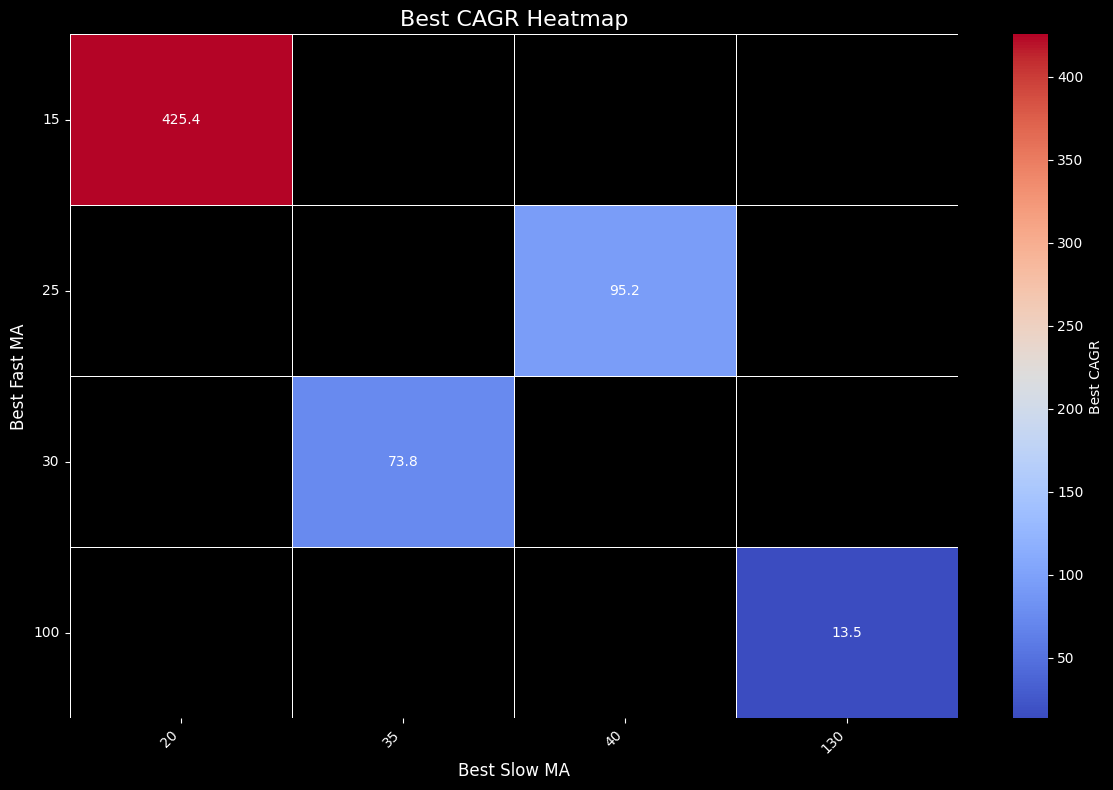

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for duplicates
duplicates = best_cagr_df.duplicated(subset=['Best Fast MA', 'Best Slow MA'])
print(f"Duplicates found: {duplicates.sum()}")

# Resolve duplicates by aggregating (e.g., using the mean of 'Best CAGR')
aggregated_df = best_cagr_df.groupby(['Best Fast MA', 'Best Slow MA'], as_index=False)['Best CAGR'].mean()

# Pivot the data
heatmap_data = aggregated_df.pivot(index='Best Fast MA', columns='Best Slow MA', values='Best CAGR')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=heatmap_data,  # Use the pivoted DataFrame
    cmap="coolwarm",
    linewidths=0.5,
    annot=True,  # Annotate each cell with its value
    fmt=".1f",   # Format the annotations to 1 decimal place
    cbar_kws={'label': 'Best CAGR'}  # Add a label to the colorbar
)

plt.title("Best CAGR Heatmap", fontsize=16)
plt.xlabel("Best Slow MA", fontsize=12)
plt.ylabel("Best Fast MA", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

# Load Data into a Pandas DataFrame

**Symbol:** `^GSPC`

**Dates:**
- **START:** `datetime.datetime(2005, 1, 1)`
- **END:** `datetime.datetime(2020, 1, 1)`
![image.png](attachment:image.png)
**Benchmark Metrics:**
- **Total Return:** 171.94%
- **CAGR:** 6.9%
- **Drawdown:** -56.78%

**Long Strategy:**
- **Fast MA:** 25
- **Slow MA:** 220
- **CAGR:** 8.33%

**Short Strategy:**
- **Fast MA:** 225
- **Slow MA:** 205
- **CAGR:** -2.0%

[*********************100%***********************]  1 of 1 completed


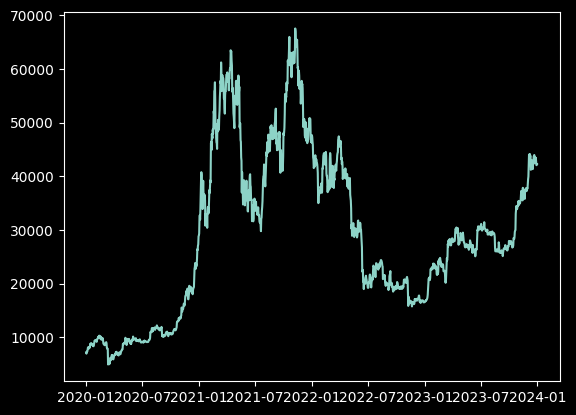

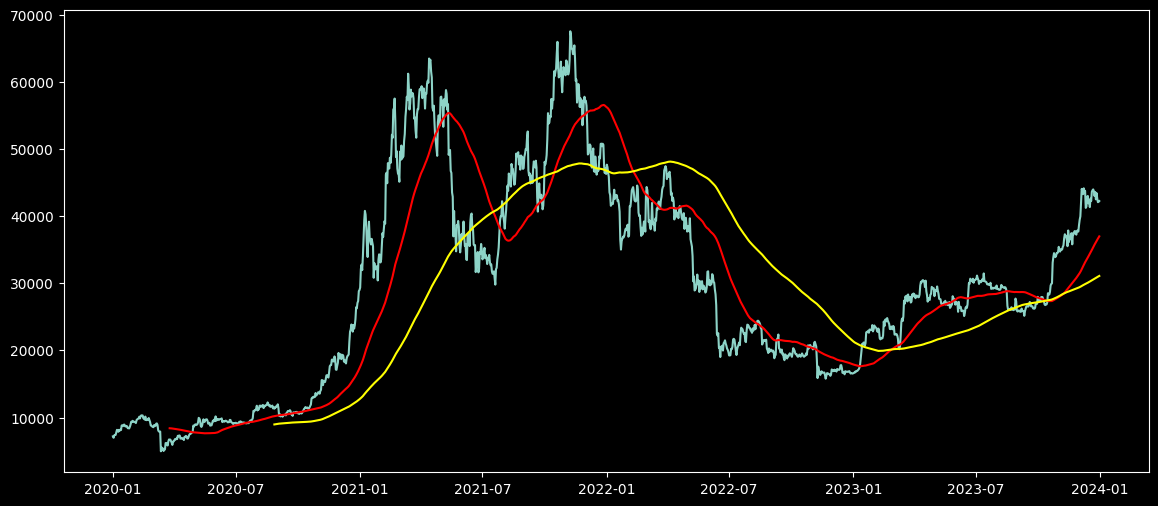

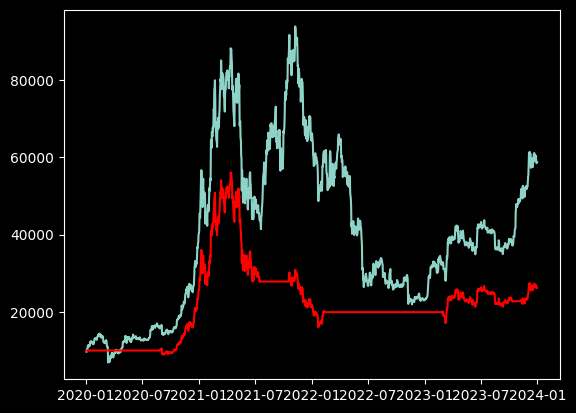

Benchmark Total return: 505.04%
Benchmark CAGR: 56.84
Benchmark DD: -76.63%

System Total return: 162.06%
System CAGR: 27.23
System DD: -71.43%
System Time in the Market: 49.49%


In [25]:
# Define variables
FAST_MA = 85
SLOW_MA = 240


# Load data into a pandas dataframe
price = yf.download(symbol, start=START, end=END)

# Drop redundant columns
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], axis=1)

# Plot chart
plt.style.use('dark_background')
plt.plot(price.Close)
plt.show()

# Calculate daily return
price['Return'] = price.Close / price.Close.shift(1)
price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

# Calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()
price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak
bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

# Calculate moving averages
price['Fast_MA'] = price.Close.rolling(window=FAST_MA).mean().iloc[:,0]
price['Slow_MA'] = price.Close.rolling(window=SLOW_MA).mean().iloc[:,0]

# Draw graph
plt.figure(figsize=(14, 6))
plt.plot(price.Close)
plt.plot(price.Fast_MA, color="red")
plt.plot(price.Slow_MA, color="yellow")
plt.show()

# Define entries
price['Long'] = price.Fast_MA > price.Slow_MA

# Calculate system balance
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Ret.cumprod()

plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal, color="red")
plt.show()

# Calculate drawdown
price['Sys_Peak'] = price.Sys_Bal.cummax()
price['Sys_DD'] = price.Sys_Bal - price.Sys_Peak
sys_dd = round((((price.Sys_DD / price.Sys_Peak).min()) * 100), 2)

# Calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1] / price.Bench_Bal.iloc[1]) ** (1 / YEARS)) - 1) * 100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1] / price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1] / price.Sys_Bal.iloc[0]) ** (1 / YEARS)) - 1) * 100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')


